# Stack_Overflow_Developer_Survey_Data_Analysis

# 1. Import Dependencies and Dataset

In [457]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import squarify

%matplotlib inline
sns.set(style="whitegrid", font='AppleGothic')

In [458]:
df = pd.read_csv('./data/survey_results_public.csv')
df_schema = pd.read_csv('./data/survey_results_schema.csv')

# 2. Understand acquired data

In [459]:
df.shape

(89184, 84)

In [460]:
df.head().T

,0,1,2,3,4
ResponseId,1,2,3,4,5
Q120,I agree,I agree,I agree,I agree,I agree
MainBranch,None of these,I am a developer by profession,I am a developer by profession,I am a developer by profession,I am a developer by profession
Age,18-24 years old,25-34 years old,45-54 years old,25-34 years old,25-34 years old
Employment,NaN,"Employed, full-time","Employed, full-time","Employed, full-time","Employed, full-time;Independent contractor, fr..."
...,...,...,...,...,...
ProfessionalTech,NaN,DevOps function;Microservices;Automated testin...,DevOps function;Microservices;Automated testin...,Automated testing;Continuous integration (CI) ...,Microservices;Automated testing;Observability ...
Industry,NaN,"Information Services, IT, Software Development...","Information Services, IT, Software Development...",NaN,Other
SurveyLength,NaN,Appropriate in length,Appropriate in length,Appropriate in length,Appropriate in length
SurveyEase,NaN,Easy,Easy,Easy,Neither easy nor difficult


In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [462]:
# Check missing value
pd.set_option('display.max_columns', None)

df.isna().sum()

ResponseId                 0
Q120                       0
MainBranch                 0
Age                        0
Employment              1286
                       ...  
ProfessionalTech       47401
Industry               52410
SurveyLength            2699
SurveyEase              2630
ConvertedCompYearly    41165
Length: 84, dtype: int64

In [463]:
columns_to_check = [
    'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
    'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize',
    'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
    'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
    'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
    'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
    'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
    'AISearchHaveWorkedWith', 'AISearchWantToWorkWith', 'AIDevHaveWorkedWith', 'AIDevWantToWorkWith', 'NEWSOSites',
    'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'SOAI', 'AISelect', 'AISent', 'AIAcc', 'AIBen',
    'AIToolInterested in Using', 'AIToolCurrently Using', 'AIToolNot interested in Using', 'AINextVery different',
    'AINextNeither different nor similar', 'AINextSomewhat similar', 'AINextVery similar', 'AINextSomewhat different',
    'TBranch', 'ICorPM', 'WorkExp', 'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4', 'Knowledge_5',
    'Knowledge_6', 'Knowledge_7', 'Knowledge_8', 'Frequency_1', 'Frequency_2', 'Frequency_3', 'TimeSearching',
    'TimeAnswering', 'ProfessionalTech', 'Industry', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly'
]

for column in columns_to_check:
    missing_ratio = (df[column].isna().sum() / len(df)) * 100
    print(f"{column} 변수의 결측값 비율: {missing_ratio:.2f}%")


Employment 변수의 결측값 비율: 1.44%
RemoteWork 변수의 결측값 비율: 17.24%
CodingActivities 변수의 결측값 비율: 17.29%
EdLevel 변수의 결측값 비율: 1.36%
LearnCode 변수의 결측값 비율: 1.71%
LearnCodeOnline 변수의 결측값 비율: 21.42%
LearnCodeCoursesCert 변수의 결측값 비율: 58.43%
YearsCode 변수의 결측값 비율: 1.96%
YearsCodePro 변수의 결측값 비율: 25.84%
DevType 변수의 결측값 비율: 13.81%
OrgSize 변수의 결측값 비율: 27.07%
PurchaseInfluence 변수의 결측값 비율: 27.16%
TechList 변수의 결측값 비율: 31.77%
BuyNewTool 변수의 결측값 비율: 6.92%
Country 변수의 결측값 비율: 1.36%
Currency 변수의 결측값 비율: 26.74%
CompTotal 변수의 결측값 비율: 45.93%
LanguageHaveWorkedWith 변수의 결측값 비율: 2.29%
LanguageWantToWorkWith 변수의 결측값 비율: 9.50%
DatabaseHaveWorkedWith 변수의 결측값 비율: 17.66%
DatabaseWantToWorkWith 변수의 결측값 비율: 31.70%
PlatformHaveWorkedWith 변수의 결측값 비율: 28.66%
PlatformWantToWorkWith 변수의 결측값 비율: 42.47%
WebframeHaveWorkedWith 변수의 결측값 비율: 24.94%
WebframeWantToWorkWith 변수의 결측값 비율: 36.38%
MiscTechHaveWorkedWith 변수의 결측값 비율: 36.07%
MiscTechWantToWorkWith 변수의 결측값 비율: 47.47%
ToolsTechHaveWorkedWith 변수의 결측값 비율: 12.67%
ToolsTechWantToWorkWith 

### How to preprocess missing value

In [673]:
# Country 변수의 결측값을 최빈값으로 대체
most_frequent_country = df['Country'].mode()[0]
df['Country'].fillna(most_frequent_country, inplace=True)

# LanguageHaveWorkedWith 변수의 결측값을 최빈값으로 대체
most_frequent_have_worked_with = df['LanguageHaveWorkedWith'].mode()[0]
df['LanguageHaveWorkedWith'].fillna(most_frequent_have_worked_with, inplace=True)

# LanguageWantToWorkWith 변수의 결측값을 최빈값으로 대체
most_frequent_want_to_work_with = df['LanguageWantToWorkWith'].mode()[0]
df['LanguageWantToWorkWith'].fillna(most_frequent_want_to_work_with, inplace=True)

# EdLevel 변수의 결측값을 최빈값으로 대체
most_frequent_ed_level = df['EdLevel'].mode()[0]
df['EdLevel'].fillna(most_frequent_ed_level, inplace=True)

# LearnCode 변수의 결측값을 최빈값으로 대체
most_frequent_learn_code = df['LearnCode'].mode()[0]
df['LearnCode'].fillna(most_frequent_learn_code, inplace=True)

# 대체 후 결측값 비율 재확인
missing_country_percentage_after_fillna = (df['Country'].isna().sum() / len(df['Country'])) * 100
missing_have_worked_with_percentage_after_fillna = (df['LanguageHaveWorkedWith'].isna().sum() / len(df['LanguageHaveWorkedWith'])) * 100
missing_want_to_work_with_percentage_after_fillna = (df['LanguageWantToWorkWith'].isna().sum() / len(df['LanguageWantToWorkWith'])) * 100
missing_ed_level_percentage_after_fillna = (df['EdLevel'].isna().sum() / len(df['EdLevel'])) * 100
missing_learn_code_percentage_after_fillna = (df['LearnCode'].isna().sum() / len(df['LearnCode'])) * 100

# 결과 출력
print(f"Country 변수의 결측값을 최빈값으로 대체하고 난 후의 결측값 비율: {missing_country_percentage_after_fillna:.2f}%")
print(f"LanguageHaveWorkedWith 변수의 결측값을 최빈값으로 대체하고 난 후의 결측값 비율: {missing_have_worked_with_percentage_after_fillna:.2f}%")
print(f"LanguageWantToWorkWith 변수의 결측값을 최빈값으로 대체하고 난 후의 결측값 비율: {missing_want_to_work_with_percentage_after_fillna:.2f}%")
print(f"EdLevel 변수의 결측값을 최빈값으로 대체하고 난 후의 결측값 비율: {missing_ed_level_percentage_after_fillna:.2f}%")
print(f"LearnCode 변수의 결측값을 최빈값으로 대체하고 난 후의 결측값 비율: {missing_learn_code_percentage_after_fillna:.2f}%")

Country 변수의 결측값을 최빈값으로 대체하고 난 후의 결측값 비율: 0.00%
LanguageHaveWorkedWith 변수의 결측값을 최빈값으로 대체하고 난 후의 결측값 비율: 0.00%
LanguageWantToWorkWith 변수의 결측값을 최빈값으로 대체하고 난 후의 결측값 비율: 0.00%
EdLevel 변수의 결측값을 최빈값으로 대체하고 난 후의 결측값 비율: 0.00%
LearnCode 변수의 결측값을 최빈값으로 대체하고 난 후의 결측값 비율: 0.00%


# 3. Write Worksheets

# 4. Data Preprocessing & Data Visualization(Data Analysis)

In [674]:
revised_df = df[['Age', 'Country', 'LanguageHaveWorkedWith', 'LearnCode', 'LearnCodeOnline',
                 'LanguageWantToWorkWith', 'EdLevel', 'DevType', 'WorkExp']]
revised_df.head().T

,0,1,2,3,4
Age,18-24 years old,25-34 years old,45-54 years old,25-34 years old,25-34 years old
Country,United States of America,United States of America,United States of America,United States of America,Philippines
LanguageHaveWorkedWith,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);Go,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,HTML/CSS;JavaScript;TypeScript
LearnCode,"Other online resources (e.g., videos, blogs, f...",Books / Physical media;Colleague;Friend or fam...,Books / Physical media;Colleague;On the job tr...,Colleague;Friend or family member;Other online...,Books / Physical media;Online Courses or Certi...
LearnCodeOnline,NaN,Formal documentation provided by the owner of ...,Formal documentation provided by the owner of ...,Formal documentation provided by the owner of ...,Formal documentation provided by the owner of ...
LanguageWantToWorkWith,Rust,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Haskell;OCaml;Rust,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,HTML/CSS;JavaScript;Python;Rust;TypeScript
EdLevel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
DevType,NaN,"Senior Executive (C-Suite, VP, etc.)","Developer, back-end","Developer, front-end","Developer, full-stack"
WorkExp,NaN,10.000000,23.000000,7.000000,6.000000


# 연령에 따른 개발자 분포

In [675]:
revised_df['Age'].unique()

array(['18-24 years old', '25-34 years old', '45-54 years old',
       '35-44 years old', 'Under 18 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [676]:
# 연령대별 응답 숫자
size_by_age = revised_df.groupby(['Age']).size()
size_by_age

Age
18-24 years old       17931
25-34 years old       33247
35-44 years old       20532
45-54 years old        8334
55-64 years old        3392
65 years or older      1171
Prefer not to say       449
Under 18 years old     4128
dtype: int64

In [677]:
size_by_age = size_by_age.reindex(index=[
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
])
size_by_age

Age
Under 18 years old     4128
18-24 years old       17931
25-34 years old       33247
35-44 years old       20532
45-54 years old        8334
55-64 years old        3392
65 years or older      1171
Prefer not to say       449
dtype: int64

In [678]:
translated_age_index = {
    'Under 18 years old': '18세 미만',
    '18-24 years old': '18-24세',
    '25-34 years old': '25-34세',
    '35-44 years old': '35-44세',
    '45-54 years old': '45-54세',
    '55-64 years old': '55-64세',
    '65 years or older': '65세 이상',
    'Prefer not to say': '응답하지 않음'
}
size_by_age.index = size_by_age.index.map(translated_age_index)

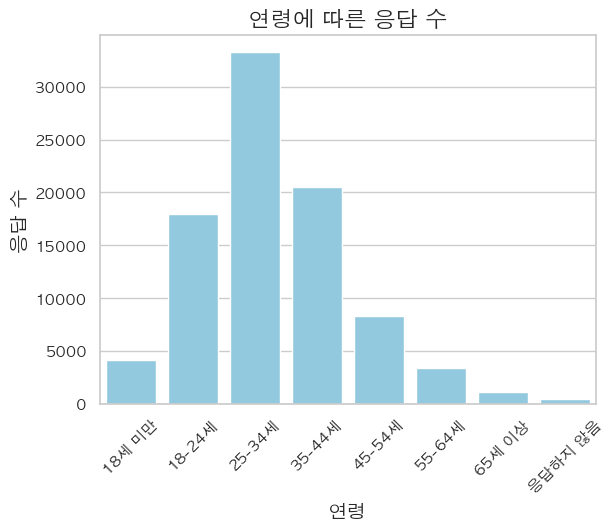

In [764]:
sns.barplot(x=size_by_age.index, y=size_by_age.values, color='skyblue')

plt.xticks(rotation=45) # x축 라벨 회전

plt.title('연령에 따른 응답 수', fontsize=16)
plt.xlabel('연령', fontsize=14)
plt.ylabel('응답 수', fontsize=14)

plt.show()

# 응답 수 상위 10개국

In [680]:
# 국가별 응답 숫자 상위 10개국 확인
size_by_country_top10 = revised_df.groupby(['Country']).size().sort_values(ascending=False)[:10]
size_by_country_top10

Country
United States of America                                19858
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
France                                                   2933
Poland                                                   2435
Netherlands                                              2383
Australia                                                2078
Brazil                                                   2042
dtype: int64

In [681]:
size_by_country_top10

Country
United States of America                                19858
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
France                                                   2933
Poland                                                   2435
Netherlands                                              2383
Australia                                                2078
Brazil                                                   2042
dtype: int64

In [682]:
new_index = [
    '미국', '독일', '인도', '영국', '캐나다',
    '프랑스', '폴란드', '네덜란드', '호주', '브라질'
]
size_by_country_top10.index = new_index
size_by_country_top10

미국      19858
독일       7328
인도       5625
영국       5552
캐나다      3507
프랑스      2933
폴란드      2435
네덜란드     2383
호주       2078
브라질      2042
dtype: int64

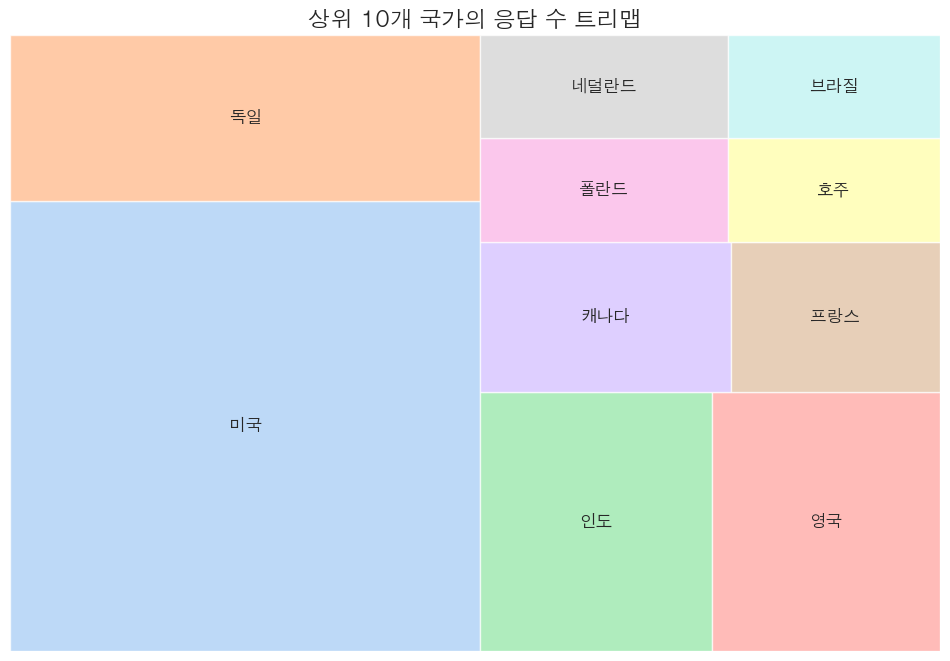

In [683]:
plt.figure(figsize=(12, 8))
sns.set_palette("pastel")

squarify.plot(sizes=size_by_country_top10, label=size_by_country_top10.index, color=sns.color_palette("pastel"), alpha=0.7)

plt.title('상위 10개 국가의 응답 수 트리맵', fontsize=16)

plt.axis('off')
plt.show()

# 사용 중인 프로그래밍 언어와 학습하길 희망하는 프로그래밍 언어

In [684]:
# 응답자가 사용한 경험이 있는 프로그래밍 언어
languages = revised_df['LanguageHaveWorkedWith']
languages # ;로 구분

0                           HTML/CSS;JavaScript;TypeScript
1                               HTML/CSS;JavaScript;Python
2                               Bash/Shell (all shells);Go
3        Bash/Shell (all shells);HTML/CSS;JavaScript;PH...
4                           HTML/CSS;JavaScript;TypeScript
                               ...                        
89179              HTML/CSS;Java;JavaScript;SQL;TypeScript
89180                                 Dart;Java;Python;SQL
89181    Assembly;Bash/Shell (all shells);C;C#;Python;R...
89182    Bash/Shell (all shells);C#;HTML/CSS;Java;JavaS...
89183                      C#;Go;JavaScript;SQL;TypeScript
Name: LanguageHaveWorkedWith, Length: 89184, dtype: object

In [685]:
languages = languages.str.split(';') # 단일 객체를 리스트로 변환
languages

0                       [HTML/CSS, JavaScript, TypeScript]
1                           [HTML/CSS, JavaScript, Python]
2                            [Bash/Shell (all shells), Go]
3        [Bash/Shell (all shells), HTML/CSS, JavaScript...
4                       [HTML/CSS, JavaScript, TypeScript]
                               ...                        
89179        [HTML/CSS, Java, JavaScript, SQL, TypeScript]
89180                            [Dart, Java, Python, SQL]
89181    [Assembly, Bash/Shell (all shells), C, C#, Pyt...
89182    [Bash/Shell (all shells), C#, HTML/CSS, Java, ...
89183                [C#, Go, JavaScript, SQL, TypeScript]
Name: LanguageHaveWorkedWith, Length: 89184, dtype: object

In [686]:
# 리스트의 각 항목을 행으로 나누기
exploded_languages = languages.explode() # 리스트의 항목을 행으로 나누는 메서드
exploded_languages

0          HTML/CSS
0        JavaScript
0        TypeScript
1          HTML/CSS
1        JavaScript
            ...    
89183            C#
89183            Go
89183    JavaScript
89183           SQL
89183    TypeScript
Name: LanguageHaveWorkedWith, Length: 472289, dtype: object

In [687]:
# 프로그래밍별 응답 수
size_by_languages = exploded_languages.groupby(exploded_languages).size().sort_values(ascending=False)
size_by_languages

LanguageHaveWorkedWith
JavaScript                 57755
HTML/CSS                   48440
Python                     43158
SQL                        42623
TypeScript                 36085
Bash/Shell (all shells)    28351
Java                       26757
C#                         24193
C++                        19634
C                          16940
PHP                        16274
PowerShell                 11902
Go                         11592
Rust                       11427
Kotlin                      7935
Ruby                        5454
Lua                         5336
Dart                        5273
Assembly                    4753
Swift                       4072
R                           3702
Visual Basic (.Net)         3568
MATLAB                      3339
VBA                         3107
Groovy                      2976
Delphi                      2831
Scala                       2422
Perl                        2151
Elixir                      2028
Objective-C         

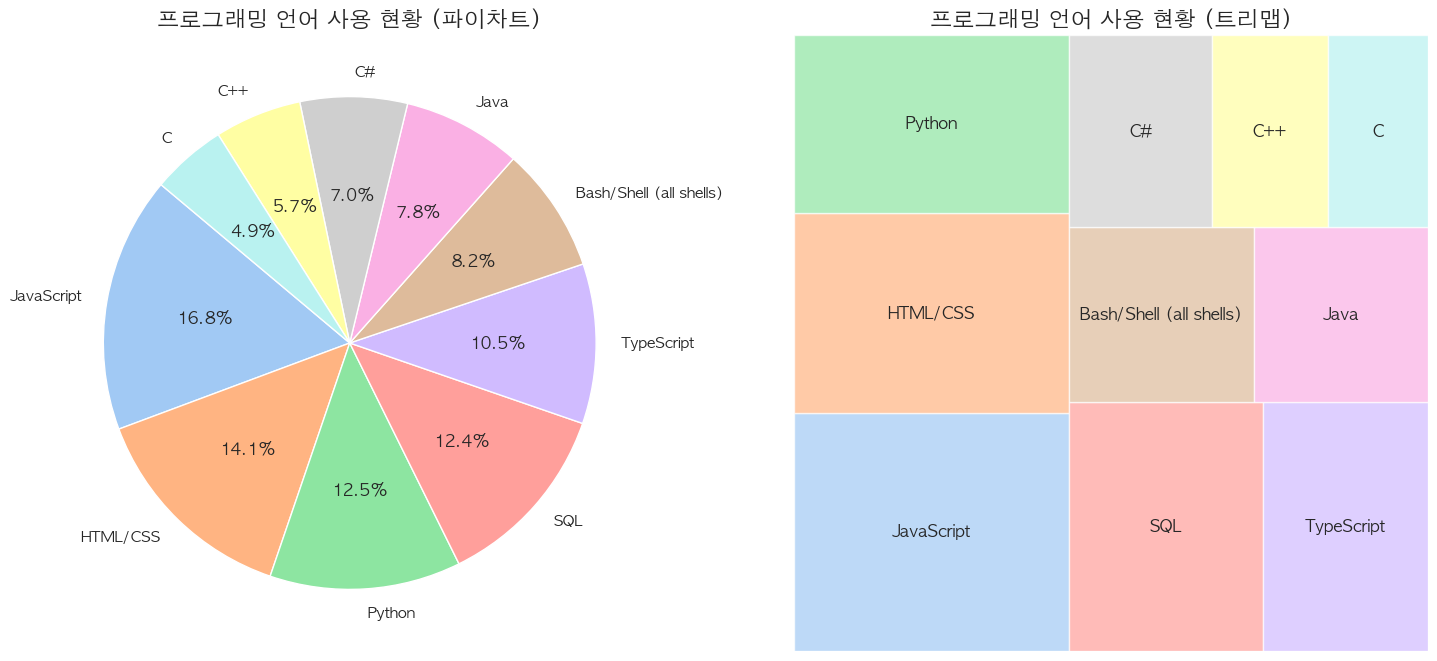

In [688]:
plt.figure(figsize=(18, 8))

# 첫 번째 subplot (원형 파이 차트)
plt.subplot(1, 2, 1)
sns.set_palette("pastel")
plt.pie(x=size_by_languages[:10], labels=size_by_languages[:10].index, autopct='%1.1f%%', startangle=140)
plt.title('프로그래밍 언어 사용 현황 (파이차트)', fontsize=16)

# 두 번째 subplot (Treemap)
plt.subplot(1, 2, 2)
sns.set_palette("pastel")
squarify.plot(sizes=size_by_languages[:10], label=size_by_languages[:10].index, color=sns.color_palette("pastel"), alpha=0.7)
plt.title('프로그래밍 언어 사용 현황 (트리맵)', fontsize=16)
plt.axis('off')

plt.show()

In [689]:
languages_for_25_34 = revised_df[revised_df.Age== '25-34 years old'] \
                                ['LanguageHaveWorkedWith'].str.split(';') \
                                .explode().value_counts() \
                                .sort_values(ascending=False)


languages_for_25_34

LanguageHaveWorkedWith
JavaScript                 21634
HTML/CSS                   17655
SQL                        15850
Python                     15818
TypeScript                 15079
Bash/Shell (all shells)    10440
Java                        9236
C#                          8359
C++                         5884
PHP                         5835
C                           4708
Go                          4703
PowerShell                  4344
Rust                        4053
Kotlin                      3175
Ruby                        2153
Dart                        1920
Lua                         1716
Swift                       1563
R                           1316
MATLAB                      1172
Groovy                      1144
Visual Basic (.Net)         1053
Assembly                    1039
Scala                       1035
VBA                          864
Elixir                       800
Objective-C                  749
Haskell                      522
Perl                

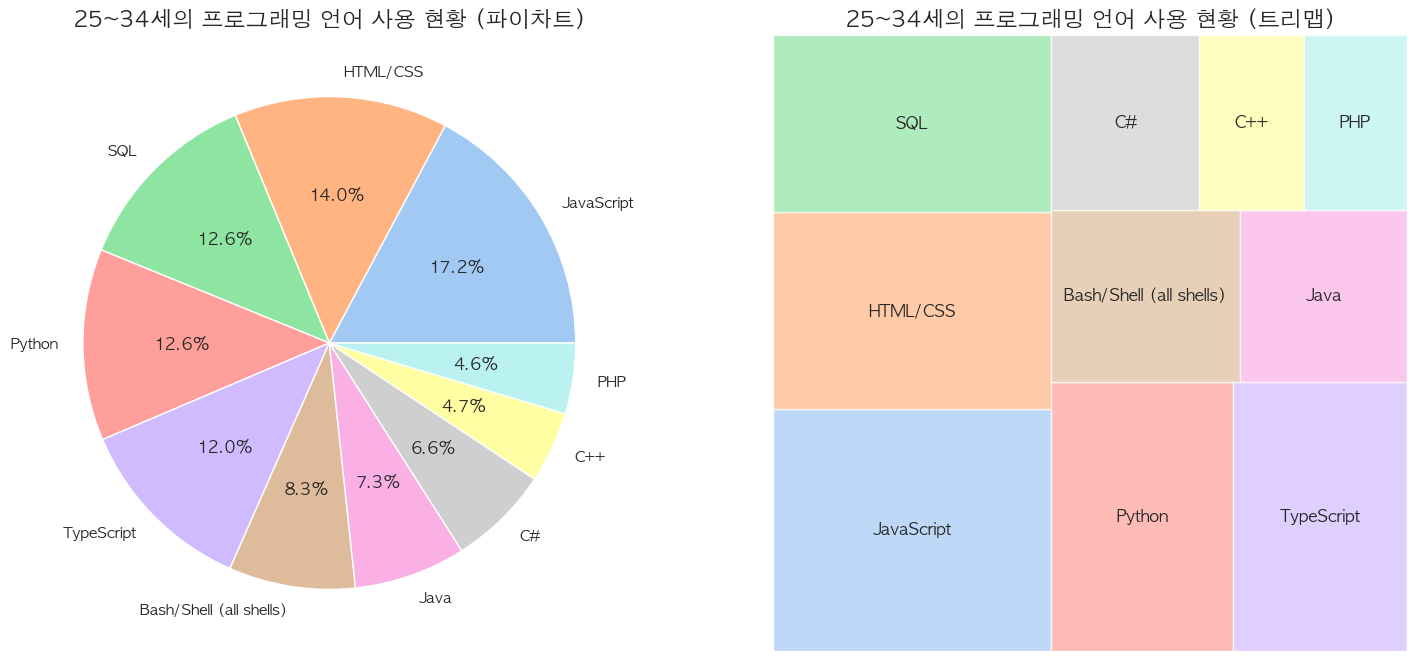

In [690]:
plt.figure(figsize=(18, 8))

# 첫 번째 subplot (원형 파이 차트)
plt.subplot(1, 2, 1)
sns.set_palette("pastel")
plt.pie(x=languages_for_25_34[:10], labels=languages_for_25_34[:10].index, autopct='%1.1f%%')
plt.title('25~34세의 프로그래밍 언어 사용 현황 (파이차트)', fontsize=16)

# 두 번째 subplot (Treemap)
plt.subplot(1, 2, 2)
sns.set_palette("pastel")
squarify.plot(sizes=languages_for_25_34[:10], label=languages_for_25_34[:10].index, color=sns.color_palette("pastel"), alpha=0.7)
plt.title('25~34세의 프로그래밍 언어 사용 현황 (트리맵)', fontsize=16)
plt.axis('off')

plt.show()

In [691]:
languages_want = revised_df['LanguageWantToWorkWith'].str.split(';').explode().value_counts().sort_values(ascending=False)
languages_want

LanguageWantToWorkWith
Rust                       35185
JavaScript                 34986
Python                     34715
TypeScript                 32256
HTML/CSS                   29928
SQL                        29598
C#                         18593
Bash/Shell (all shells)    18279
Go                         17993
Java                       14384
C++                        14231
Kotlin                     10558
C                          10029
PHP                         8014
PowerShell                  6142
Dart                        6056
Swift                       5387
Ruby                        4293
Lua                         4082
Elixir                      3880
Assembly                    3830
Zig                         3647
Haskell                     3360
R                           3068
Scala                       2770
Julia                       2184
F#                          2101
Delphi                      1948
Clojure                     1910
Lisp                

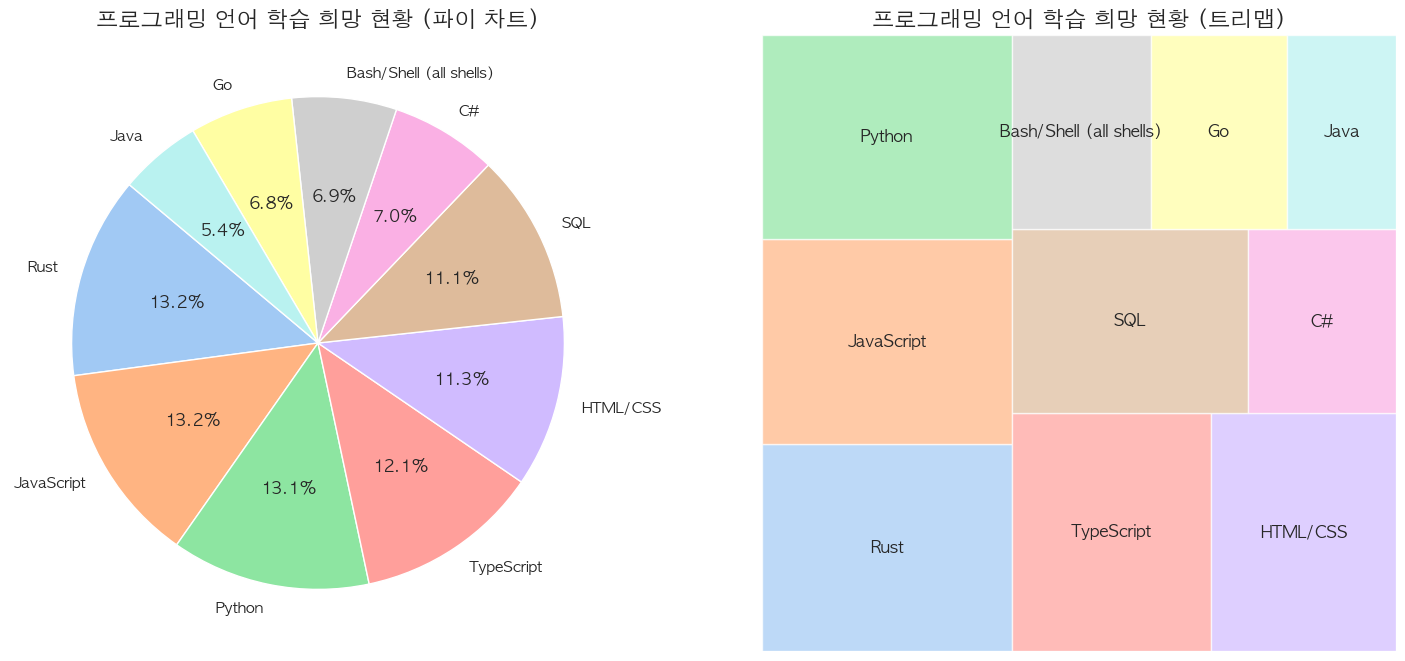

In [692]:
plt.figure(figsize=(18, 8))

# 첫 번째 subplot (원형 파이 차트)
plt.subplot(1, 2, 1)
sns.set_palette("pastel")
plt.pie(x=languages_want[:10], labels=languages_want[:10].index, autopct='%1.1f%%', startangle=140)
plt.title('프로그래밍 언어 학습 희망 현황 (파이 차트)', fontsize=16)

# 두 번째 subplot (Treemap)
plt.subplot(1, 2, 2)
sns.set_palette("pastel")
squarify.plot(sizes=languages_want[:10], label=languages_want[:10].index, color=sns.color_palette("pastel"), alpha=0.7)
plt.title('프로그래밍 언어 학습 희망 현황 (트리맵)', fontsize=16)
plt.axis('off')

plt.show()

In [693]:
languages_want_for_25_34 = revised_df[revised_df.Age== '25-34 years old'] \
                                ['LanguageWantToWorkWith'].str.split(';') \
                                .explode().value_counts() \
                                .sort_values(ascending=False)


languages_want_for_25_34

LanguageWantToWorkWith
TypeScript                 13336
Rust                       13136
JavaScript                 12965
Python                     12816
SQL                        10824
HTML/CSS                   10771
Go                          7404
Bash/Shell (all shells)     6538
C#                          6410
Java                        4919
C++                         4257
Kotlin                      4091
C                           2695
PHP                         2675
Dart                        2235
PowerShell                  2036
Swift                       1927
Ruby                        1539
Elixir                      1532
Lua                         1326
Zig                         1233
Scala                       1186
Haskell                     1109
R                           1005
Assembly                     864
Julia                        823
F#                           721
Clojure                      694
Solidity                     600
Erlang              

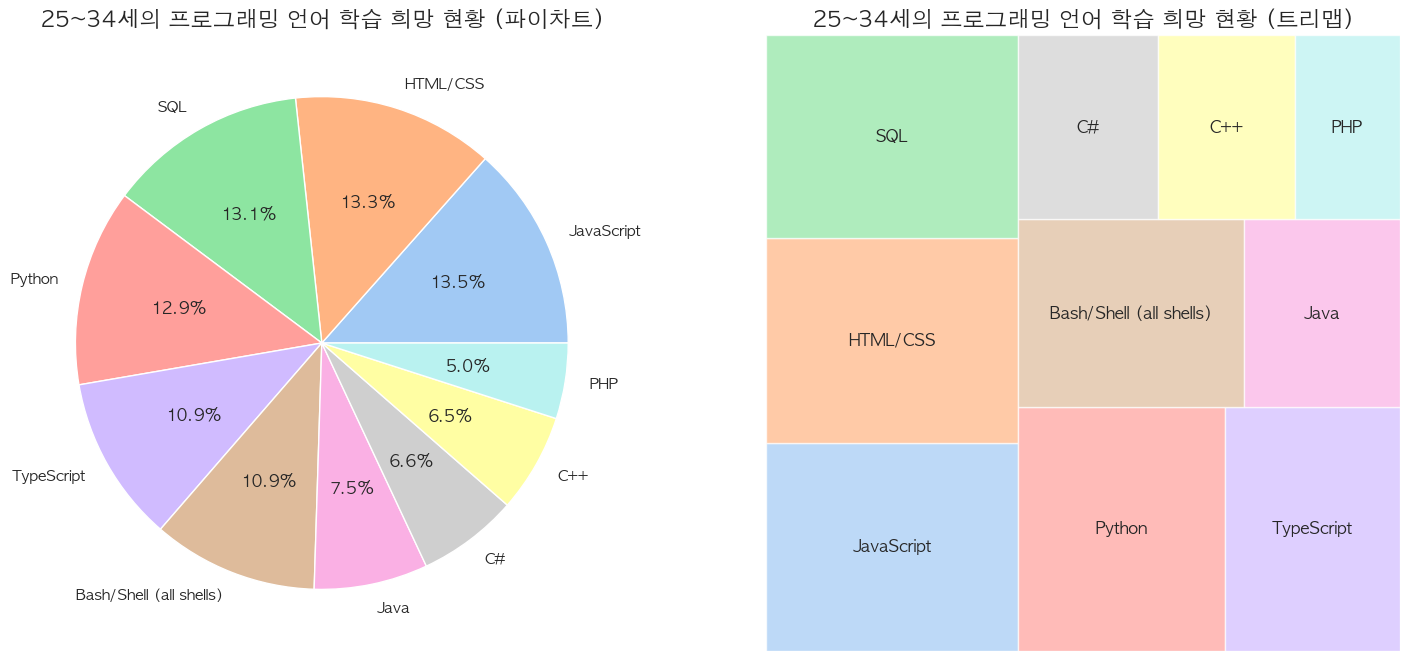

In [694]:
plt.figure(figsize=(18, 8))

# 첫 번째 subplot (원형 파이 차트)
plt.subplot(1, 2, 1)
sns.set_palette("pastel")
plt.pie(x=languages_want_for_25_34[:10], labels=languages_for_25_34[:10].index, autopct='%1.1f%%')
plt.title('25~34세의 프로그래밍 언어 학습 희망 현황 (파이차트)', fontsize=16)

# 두 번째 subplot (Treemap)
plt.subplot(1, 2, 2)
sns.set_palette("pastel")
squarify.plot(sizes=languages_want_for_25_34[:10], label=languages_for_25_34[:10].index, color=sns.color_palette("pastel"), alpha=0.7)
plt.title('25~34세의 프로그래밍 언어 학습 희망 현황 (트리맵)', fontsize=16)
plt.axis('off')

plt.show()

# 학습 방법

In [741]:
learnCode = revised_df['LearnCode'].str.split(';')
learnCode

0        [Other online resources (e.g., videos, blogs, ...
1        [Books / Physical media, Colleague, Friend or ...
2        [Books / Physical media, Colleague, On the job...
3        [Colleague, Friend or family member, Other onl...
4        [Books / Physical media, Online Courses or Cer...
                               ...                        
89179    [Online Courses or Certification, Other online...
89180    [Colleague, Online Courses or Certification, O...
89181    [Books / Physical media, Hackathons (virtual o...
89182    [Online Courses or Certification, Other online...
89183    [Colleague, Online Courses or Certification, O...
Name: LearnCode, Length: 89184, dtype: object

In [757]:
exploded_learnCode = learnCode.explode()
exploded_learnCode

0        Other online resources (e.g., videos, blogs, f...
1                                   Books / Physical media
1                                                Colleague
1                                  Friend or family member
1                        Hackathons (virtual or in-person)
                               ...                        
89182    Other online resources (e.g., videos, blogs, f...
89182              School (i.e., University, College, etc)
89183                                            Colleague
89183                      Online Courses or Certification
89183    Other online resources (e.g., videos, blogs, f...
Name: LearnCode, Length: 296254, dtype: object

In [758]:
exploded_learnCode.value_counts()

LearnCode
Other online resources (e.g., videos, blogs, forum)    71765
Books / Physical media                                 45406
School (i.e., University, College, etc)                43957
Online Courses or Certification                        43201
On the job training                                    40380
Colleague                                              20523
Friend or family member                                 9936
Coding Bootcamp                                         8602
Hackathons (virtual or in-person)                       7033
Other (please specify):                                 5451
Name: count, dtype: int64

In [762]:
translated_dict = {
    'Other online resources (e.g., videos, blogs, forum)': '온라인 자료(동영상, 블로그, 포럼 등)',
    'Books / Physical media': '책 / 물리적 매체',
    'School (i.e., University, College, etc)': '학교 (대학, 대학교 등)',
    'Online Courses or Certification': '온라인 강의 또는 자격증',
    'On the job training': '직장에서의 교육',
    'Colleague': '동료',
    'Friend or family member': '친구 또는 가족 구성원',
    'Coding Bootcamp': '코딩 부트캠프',
    'Hackathons (virtual or in-person)': '해커톤(가상 또는 대면)',
    'Other (please specify):': '기타'
}

exploded_learnCode = exploded_learnCode.map(translated_dict)
exploded_learnCode

0        온라인 자료(동영상, 블로그, 포럼 등)
1                    책 / 물리적 매체
1                            동료
1                  친구 또는 가족 구성원
1                 해커톤(가상 또는 대면)
                  ...          
89182    온라인 자료(동영상, 블로그, 포럼 등)
89182            학교 (대학, 대학교 등)
89183                        동료
89183             온라인 강의 또는 자격증
89183    온라인 자료(동영상, 블로그, 포럼 등)
Name: LearnCode, Length: 296254, dtype: object

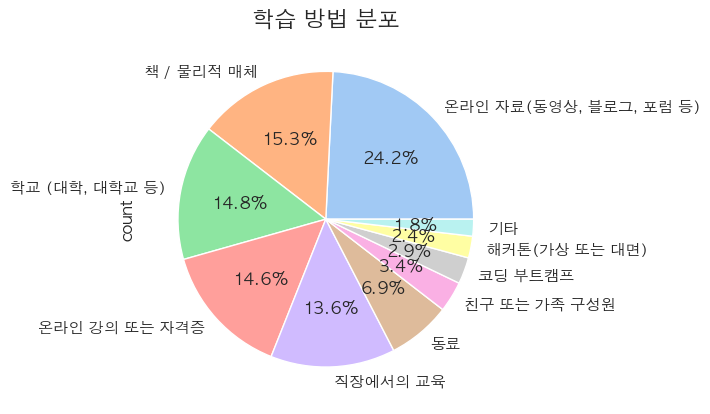

In [763]:
exploded_learnCode.value_counts().plot.pie(autopct='%1.01f%%')
plt.title('학습 방법 분포', fontsize=16)
plt.show()

In [729]:
learnCodeOnline = revised_df['LearnCodeOnline'].str.split(';')
learnCodeOnline

0                                                      NaN
1        [Formal documentation provided by the owner of...
2        [Formal documentation provided by the owner of...
3        [Formal documentation provided by the owner of...
4        [Formal documentation provided by the owner of...
                               ...                        
89179    [Formal documentation provided by the owner of...
89180    [Formal documentation provided by the owner of...
89181                                                  NaN
89182    [Formal documentation provided by the owner of...
89183    [Formal documentation provided by the owner of...
Name: LearnCodeOnline, Length: 89184, dtype: object

In [730]:
exploded_learnCodeOnline = learnCodeOnline.explode()
exploded_learnCodeOnline

0                                                      NaN
1        Formal documentation provided by the owner of ...
1                               Blogs with tips and tricks
1                                                    Books
1                                 Recorded coding sessions
                               ...                        
89183                                        How-to videos
89183                           Video-based Online Courses
89183                         Written-based Online Courses
89183                                    Written Tutorials
89183                                       Stack Overflow
Name: LearnCodeOnline, Length: 473130, dtype: object

In [731]:
unique_values = exploded_learnCodeOnline.unique()
print(unique_values)

[nan 'Formal documentation provided by the owner of the tech'
 'Blogs with tips and tricks' 'Books' 'Recorded coding sessions'
 'How-to videos' 'Video-based Online Courses'
 'Written-based Online Courses' 'Auditory material (e.g., podcasts)'
 'Online challenges (e.g., daily or weekly coding challenges)'
 'Written Tutorials' 'Click to write Choice 20' 'Stack Overflow'
 'Interactive tutorial' 'Certification videos' 'Programming Games'
 'Other (Please specify):']


In [732]:
exploded_learnCodeOnline.value_counts()

LearnCodeOnline
Formal documentation provided by the owner of the tech         63329
Stack Overflow                                                 57861
Blogs with tips and tricks                                     53745
How-to videos                                                  42149
Written Tutorials                                              42012
Video-based Online Courses                                     34629
Books                                                          30432
Click to write Choice 20                                       29780
Written-based Online Courses                                   25309
Recorded coding sessions                                       19690
Interactive tutorial                                           18242
Online challenges (e.g., daily or weekly coding challenges)    15544
Certification videos                                            9326
Auditory material (e.g., podcasts)                              5571
Programming Games 

In [733]:
translated_index = {
    'Formal documentation provided by the owner of the tech': '기술 소유자가 제공하는 공식 문서',
    'Stack Overflow': '스택 오버플로우',
    'Blogs with tips and tricks': '블로그 자료',
    'How-to videos': 'How-to 비디오',
    'Written Tutorials': '문서 튜토리얼',
    'Video-based Online Courses': '비디오 기반 온라인 강좌',
    'Books': '도서',
    'Click to write Choice 20': 'Click to write Choice 20',
    'Written-based Online Courses': '문서 기반 온라인 강좌',
    'Recorded coding sessions': '녹화된 코딩 세션',
    'Interactive tutorial': '인터랙티브 튜토리얼',
    'Online challenges (e.g., daily or weekly coding challenges)': '온라인 챌린지 (일일 또는 주간 코딩 챌린지)',
    'Certification videos': '자격증 비디오',
    'Auditory material (e.g., podcasts)': '청각 자료 (예: 팟캐스트)',
    'Programming Games': '프로그래밍 게임',
    'Other (Please specify):': '기타'
}

exploded_learnCodeOnline = exploded_learnCodeOnline.value_counts().rename(index=translated_index)
exploded_learnCodeOnline

LearnCodeOnline
기술 소유자가 제공하는 공식 문서           63329
스택 오버플로우                     57861
블로그 자료                       53745
How-to 비디오                   42149
문서 튜토리얼                      42012
비디오 기반 온라인 강좌                34629
도서                           30432
Click to write Choice 20     29780
문서 기반 온라인 강좌                 25309
녹화된 코딩 세션                    19690
인터랙티브 튜토리얼                   18242
온라인 챌린지 (일일 또는 주간 코딩 챌린지)    15544
자격증 비디오                       9326
청각 자료 (예: 팟캐스트)               5571
프로그래밍 게임                      4131
기타                            2280
Name: count, dtype: int64

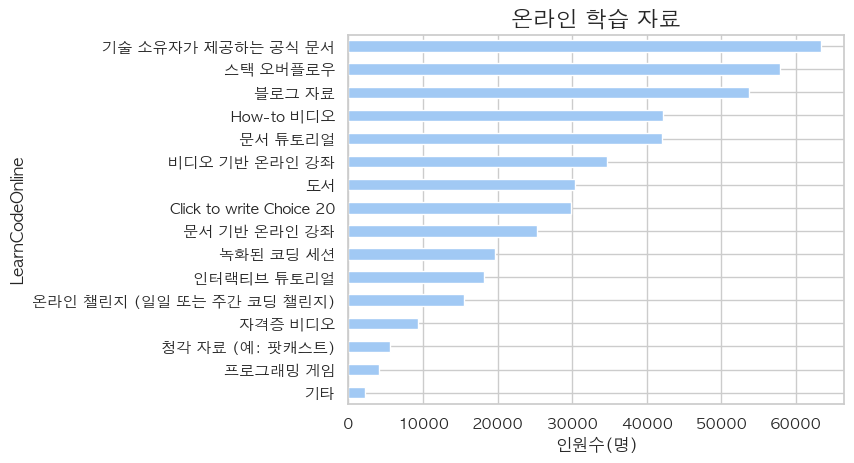

In [735]:
exploded_learnCodeOnline.sort_values(ascending=True).plot.barh()

plt.title('온라인 학습 자료', fontsize=16)
plt.xlabel('인원수(명)')
plt.show()

# 교육수준별 직업 유형

In [704]:
revised_df['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          37917
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       20543
Some college/university study without earning a degree                                11753
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8897
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         3887
Associate degree (A.A., A.S., etc.)                                                    2807
Primary/elementary school                                                              1905
Something else                                                                         1475
Name: count, dtype: int64

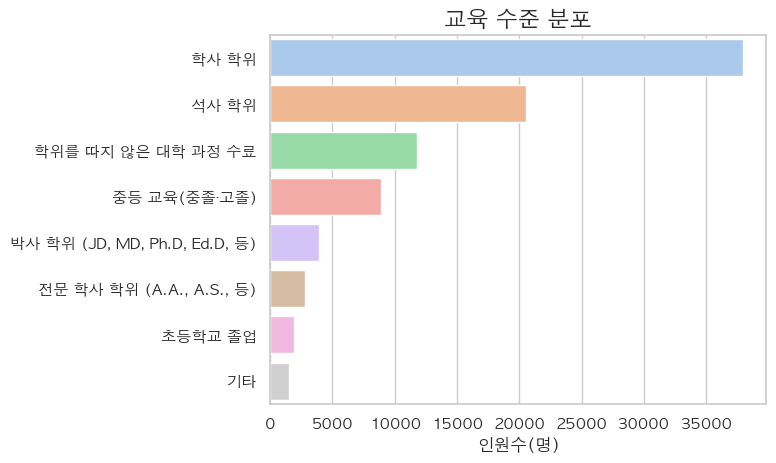

In [705]:
# 교육 수준에 대한 빈도수 계산
ed_level_counts = revised_df['EdLevel'].value_counts()

# 인덱스명을 한글로 변경
ed_level_counts.index = [
    '학사 학위',
    '석사 학위',
    '학위를 따지 않은 대학 과정 수료',
    '중등 교육(중졸·고졸)',
    '박사 학위 (JD, MD, Ph.D, Ed.D, 등)',
    '전문 학사 학위 (A.A., A.S., 등)',
    '초등학교 졸업',
    '기타'
]

sns.barplot(x=ed_level_counts, y=ed_level_counts.index)
plt.xlabel('인원수(명)')
plt.title('교육 수준 분포', fontsize=16)

plt.show()

In [708]:
# 학사 학위를 가진 사람들의 직업 유형 Top10
bachelor_data = revised_df[revised_df['EdLevel'] == 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)']
bachelor_job_counts = bachelor_data['DevType'].value_counts()

bachelor_data['DevType'].value_counts().head(10)

DevType
Developer, full-stack                            12466
Developer, back-end                               6763
Developer, front-end                              2574
Developer, desktop or enterprise applications     1582
Developer, mobile                                 1350
Other (please specify):                           1182
Engineering manager                                949
Developer, embedded applications or devices        845
DevOps specialist                                  634
Engineer, data                                     552
Name: count, dtype: int64

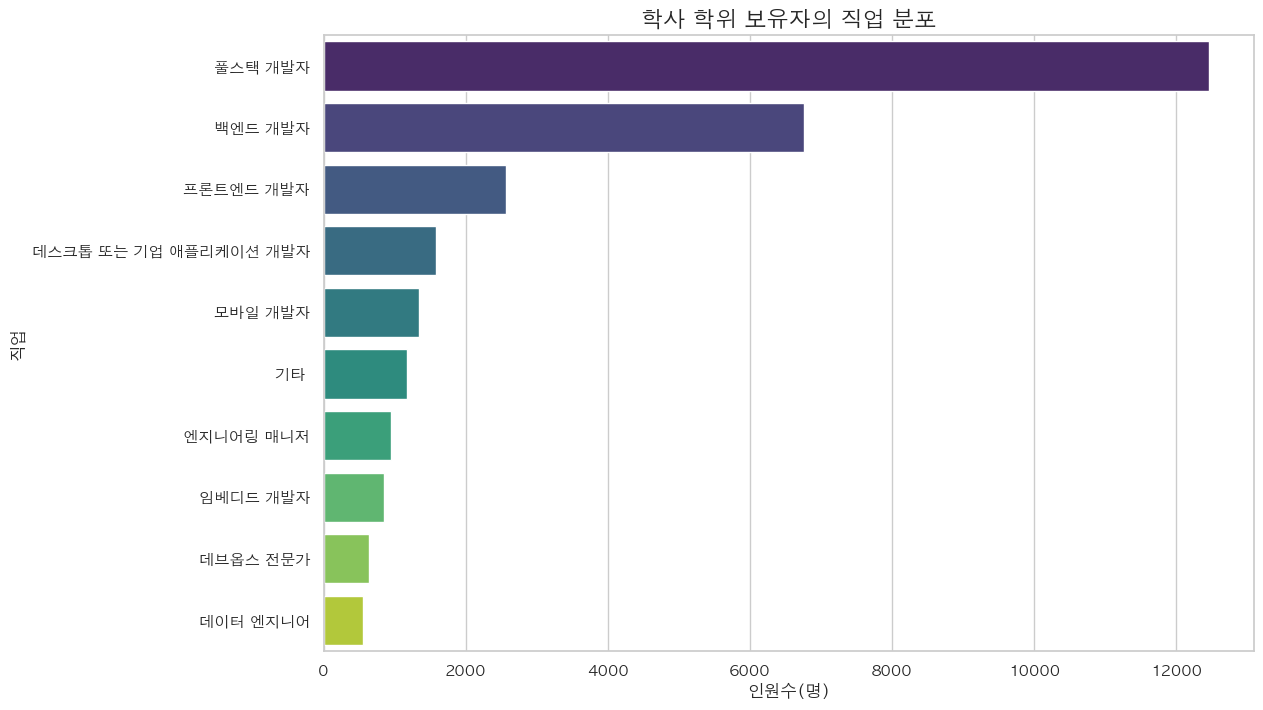

In [777]:
# 학사 학위를 가진 사람들의 데이터 추출
bachelor_data = revised_df[revised_df['EdLevel'] == 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)']

# 학사 학위를 가진 사람들의 직업 빈도수 계산
bachelor_job_counts = bachelor_data['DevType'].value_counts().head(10)

translated_index = {
    'Developer, full-stack': '풀스택 개발자',
    'Developer, back-end': '백엔드 개발자',
    'Developer, front-end': '프론트엔드 개발자',
    'Developer, desktop or enterprise applications': '데스크톱 또는 기업 애플리케이션 개발자',
    'Developer, mobile': '모바일 개발자',
    'Other (please specify):': '기타 ',
    'Engineering manager': '엔지니어링 매니저',
    'Developer, embedded applications or devices': '임베디드 개발자',
    'DevOps specialist': '데브옵스 전문가',
    'Engineer, data': '데이터 엔지니어'
}

bachelor_job_counts.index = bachelor_job_counts.index.map(translated_index)

plt.figure(figsize=(12, 8))

sns.barplot(x=bachelor_job_counts, y=bachelor_job_counts.index, palette='viridis')

plt.title('학사 학위 보유자의 직업 분포', fontsize=16)

plt.xlabel('인원수(명)')
plt.ylabel('직업')

plt.show()

In [778]:
# 석사 학위를 가진 사람들의 직업 유형 Top10
master_data = revised_df[revised_df['EdLevel'] == 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)']
master_job_counts = master_data['DevType'].value_counts()

master_data['DevType'].value_counts().head(10)

DevType
Developer, full-stack                            5484
Developer, back-end                              3838
Developer, desktop or enterprise applications    1125
Developer, front-end                              902
Other (please specify):                           779
Data scientist or machine learning specialist     776
Developer, mobile                                 673
Engineering manager                               671
Developer, embedded applications or devices       654
Academic researcher                               523
Name: count, dtype: int64

In [779]:
translated_index = {
    'Developer, full-stack': '풀스택 개발자',
    'Developer, back-end': '백엔드 개발자',
    'Developer, desktop or enterprise applications': '데스크톱 또는 기업 애플리케이션 개발자',
    'Developer, front-end': '프론트엔드 개발자',
    'Other (please specify):': '기타',
    'Data scientist or machine learning specialist': '데이터 과학자 또는 머신러닝 전문가',
    'Developer, mobile': '모바일 개발자',
    'Engineering manager': '엔지니어링 매니저',
    'Developer, embedded applications or devices': '임베디드 개발자',
    'Academic researcher': '학술 연구원'
}

master_job_counts.index = master_job_counts.index.map(translated_index) # 데이터프레임의 인덱스를 한글로 변경

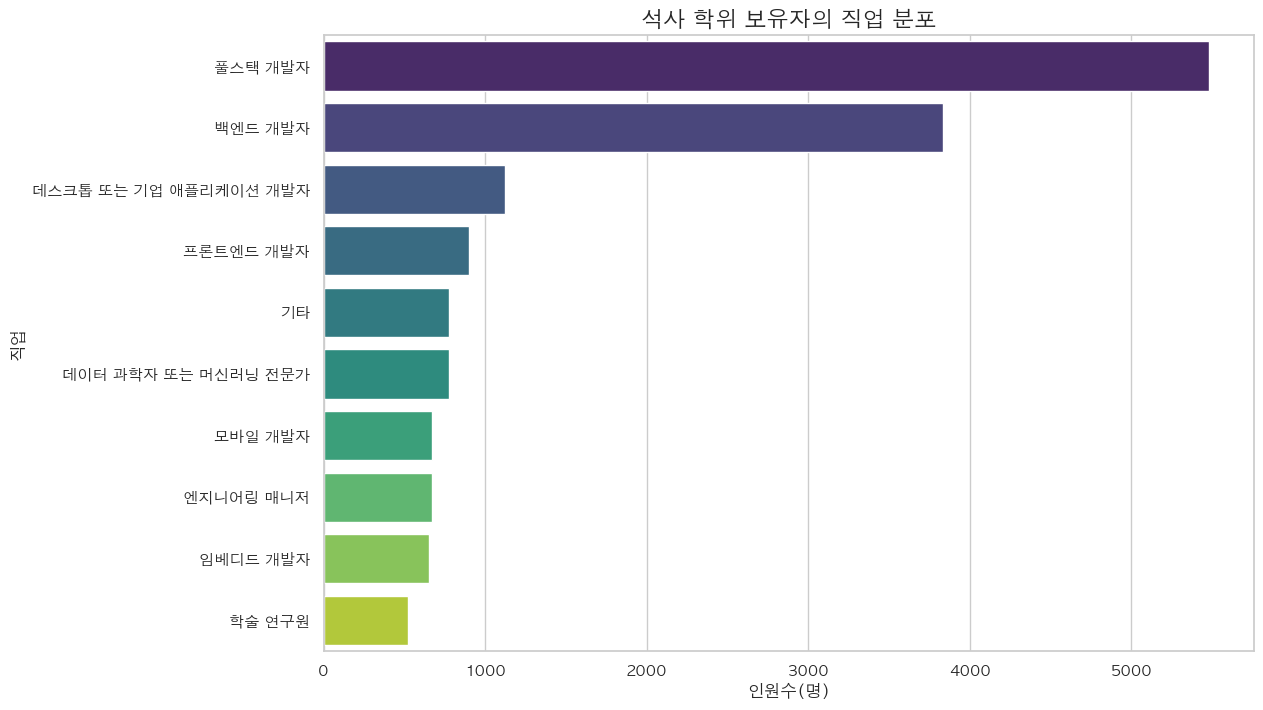

In [780]:
plt.figure(figsize=(12, 8))

sns.barplot(x=master_job_counts, y=master_job_counts.index, palette='viridis')

plt.title('석사 학위 보유자의 직업 분포', fontsize=16)

plt.xlabel('인원수(명)')
plt.ylabel('직업')

plt.show()

In [781]:
# 박사 학위를 가진 사람들의 직업 유형 Top10
professional_data = revised_df[revised_df['EdLevel'] == 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)']
professional_job_counts = professional_data['DevType'].value_counts()

professional_data['DevType'].value_counts().head(10)

DevType
Developer, full-stack                            630
Academic researcher                              561
Developer, back-end                              431
Data scientist or machine learning specialist    287
Research & Development role                      278
Scientist                                        194
Other (please specify):                          186
Developer, desktop or enterprise applications    181
Senior Executive (C-Suite, VP, etc.)             102
Educator                                          99
Name: count, dtype: int64

In [782]:
# 주어진 인덱스와 대응할 한글 인덱스 딕셔너리
translated_index = {
    'Developer, full-stack': '풀스택 개발자',
    'Academic researcher': '학술 연구원',
    'Developer, back-end': '백엔드 개발자',
    'Data scientist or machine learning specialist': '데이터 과학자 또는 머신러닝 전문가',
    'Research & Development role': '연구원 및 개발자',
    'Scientist': '과학자',
    'Other (please specify):': '기타',
    'Developer, desktop or enterprise applications': '데스크톱 또는 기업 애플리케이션 개발자',
    'Senior Executive (C-Suite, VP, etc.)': '고위 경영진 (CEO, 부사장 등)',
    'Educator': '교육자'
}

professional_job_counts.index = professional_job_counts.index.map(translated_index) # 데이터프레임의 인덱스를 한글로 변경

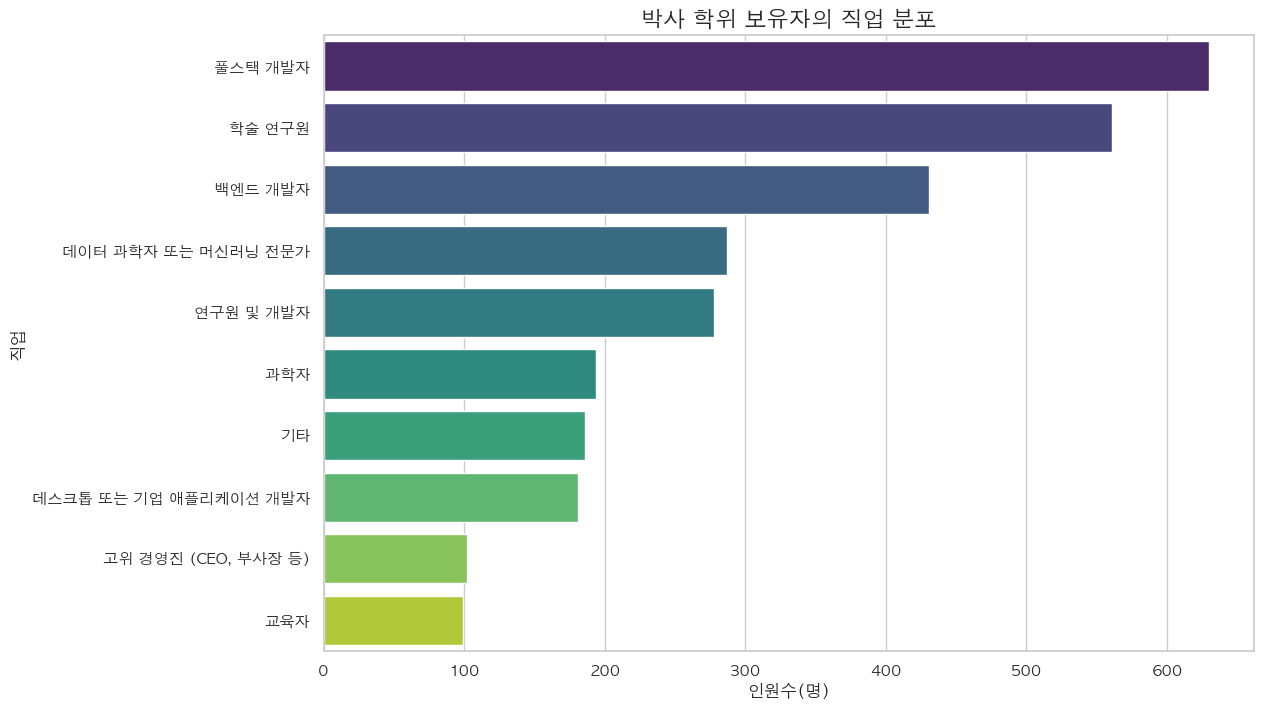

In [783]:
plt.figure(figsize=(12, 8))

sns.barplot(x=professional_job_counts, y=professional_job_counts.index, palette='viridis')

plt.title('박사 학위 보유자의 직업 분포', fontsize=16)

plt.xlabel('인원수(명)')
plt.ylabel('직업')

plt.show()

# 상위 3개 직업 경력 분포

In [784]:
revised_df['DevType'].value_counts()[:10]

DevType
Developer, full-stack                            25735
Developer, back-end                              13745
Developer, front-end                              5071
Developer, desktop or enterprise applications     3904
Other (please specify):                           3080
Developer, mobile                                 2597
Engineering manager                               2033
Student                                           1996
Developer, embedded applications or devices       1845
Data scientist or machine learning specialist     1588
Name: count, dtype: int64

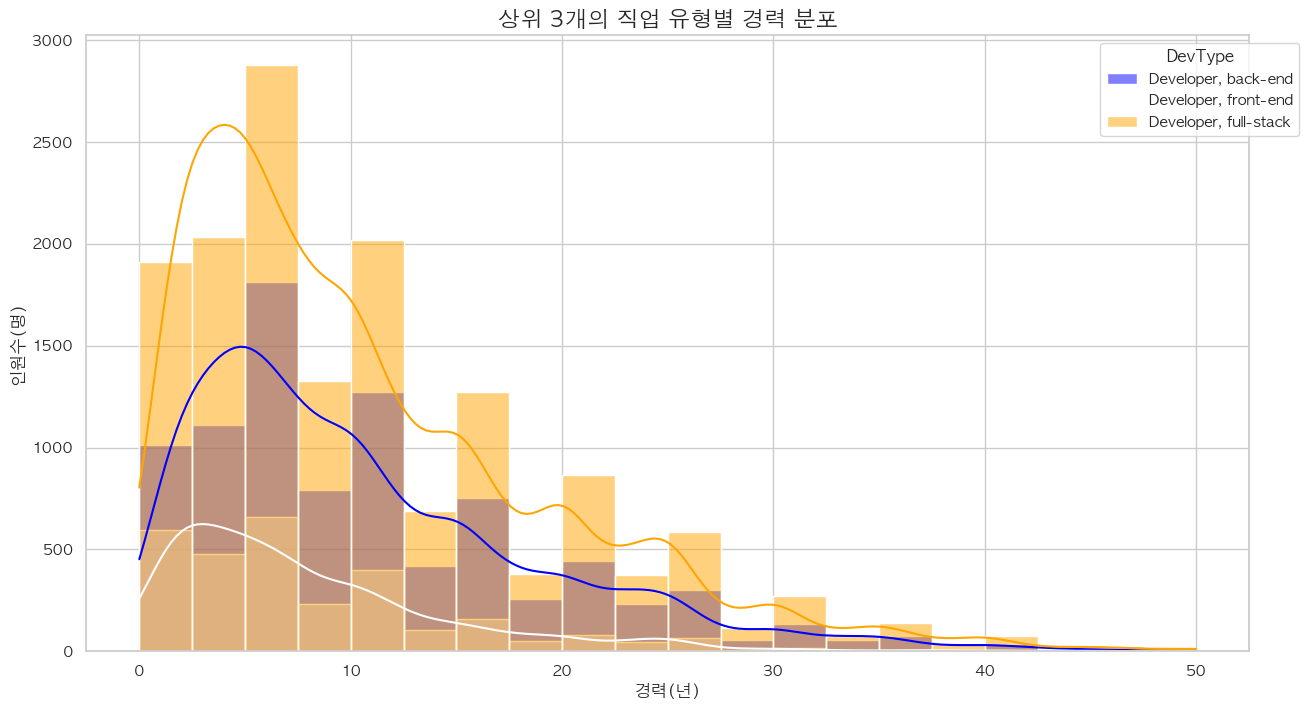

In [786]:
# 상위 3개의 개발 유형을 추출
top_devtypes = revised_df['DevType'].value_counts().head(3).index

# 개발 유형을 기준으로 그룹화 (상위 3개만 선택)
grouped_by_devtype = revised_df[revised_df['DevType'].isin(top_devtypes)].groupby('DevType')

# 색상 리스트 정의
colors = ['blue', 'white', 'orange']

# 각 DevType에 대한 경력 분포 시각화
plt.figure(figsize=(15, 8))
for i, (devtype, data) in enumerate(grouped_by_devtype):
    sns.histplot(data=data, x='WorkExp', label=devtype, kde=True, bins=20, alpha=0.5, color=colors[i])

plt.title('상위 3개의 직업 유형별 경력 분포', fontsize=16)
plt.xlabel('경력(년)')
plt.ylabel('인원수(명)')
plt.legend(title='DevType', bbox_to_anchor=(1.05, 1), loc='upper right')

plt.show()


# Configure Dash Board

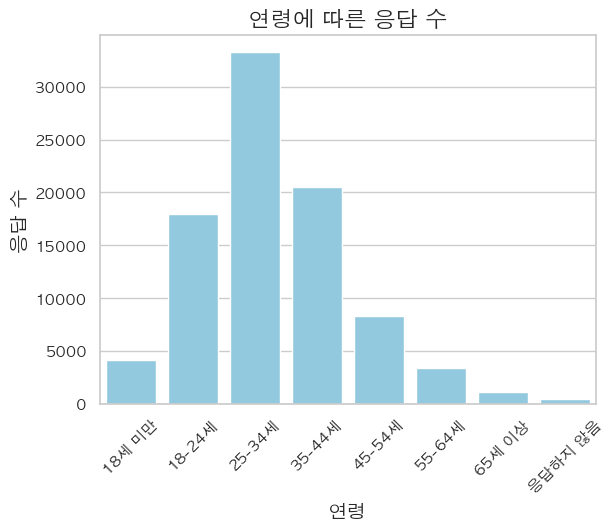

In [787]:
sns.barplot(x=size_by_age.index, y=size_by_age.values, color='skyblue')

plt.xticks(rotation=45) # x축 라벨 회전

plt.title('연령에 따른 응답 수', fontsize=16)
plt.xlabel('연령', fontsize=14)
plt.ylabel('응답 수', fontsize=14)

plt.show()

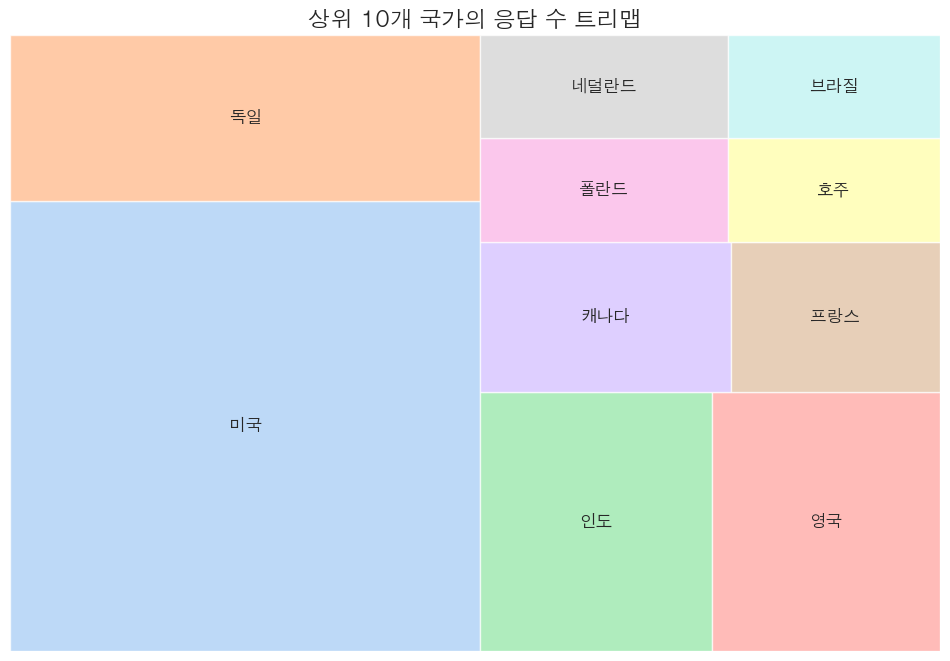

In [788]:
plt.figure(figsize=(12, 8))
sns.set_palette("pastel")

squarify.plot(sizes=size_by_country_top10, label=size_by_country_top10.index, color=sns.color_palette("pastel"), alpha=0.7)

plt.title('상위 10개 국가의 응답 수 트리맵', fontsize=16)

plt.axis('off')
plt.show()

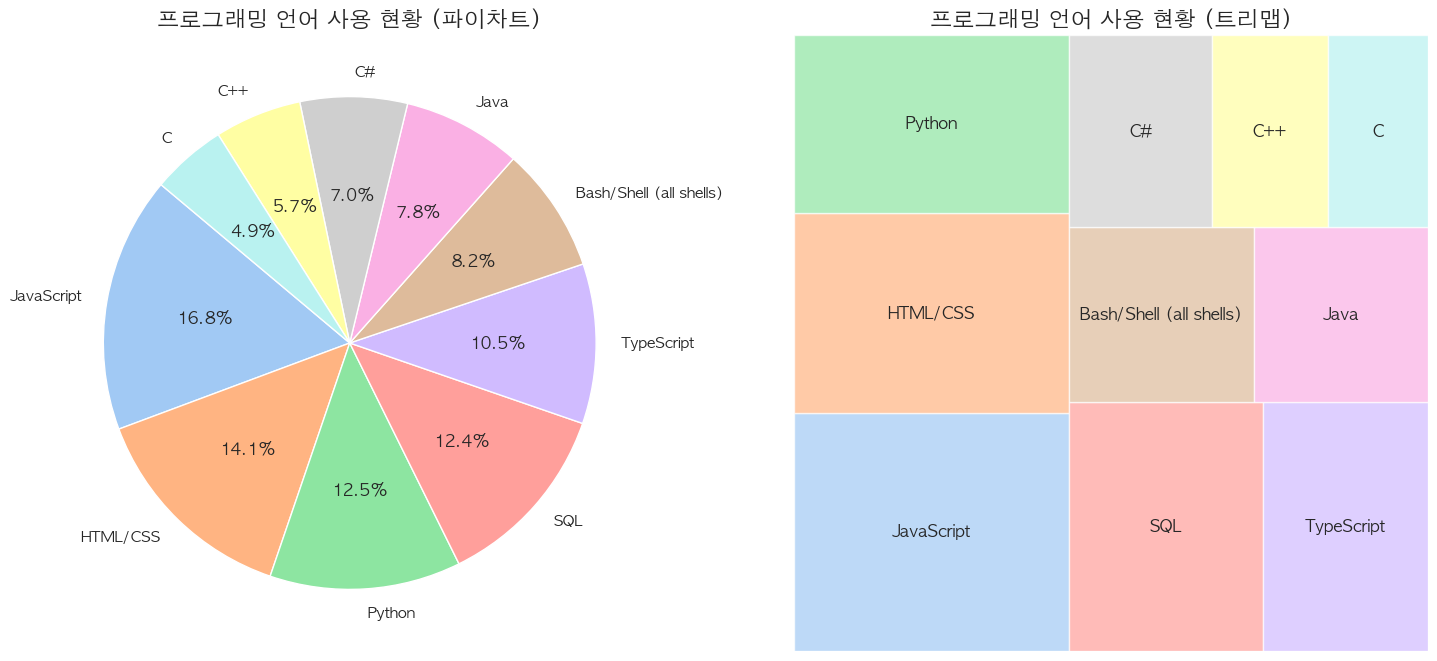

In [789]:
plt.figure(figsize=(18, 8))

# 첫 번째 subplot (원형 파이 차트)
plt.subplot(1, 2, 1)
sns.set_palette("pastel")
plt.pie(x=size_by_languages[:10], labels=size_by_languages[:10].index, autopct='%1.1f%%', startangle=140)
plt.title('프로그래밍 언어 사용 현황 (파이차트)', fontsize=16)

# 두 번째 subplot (Treemap)
plt.subplot(1, 2, 2)
sns.set_palette("pastel")
squarify.plot(sizes=size_by_languages[:10], label=size_by_languages[:10].index, color=sns.color_palette("pastel"), alpha=0.7)
plt.title('프로그래밍 언어 사용 현황 (트리맵)', fontsize=16)
plt.axis('off')

plt.show()

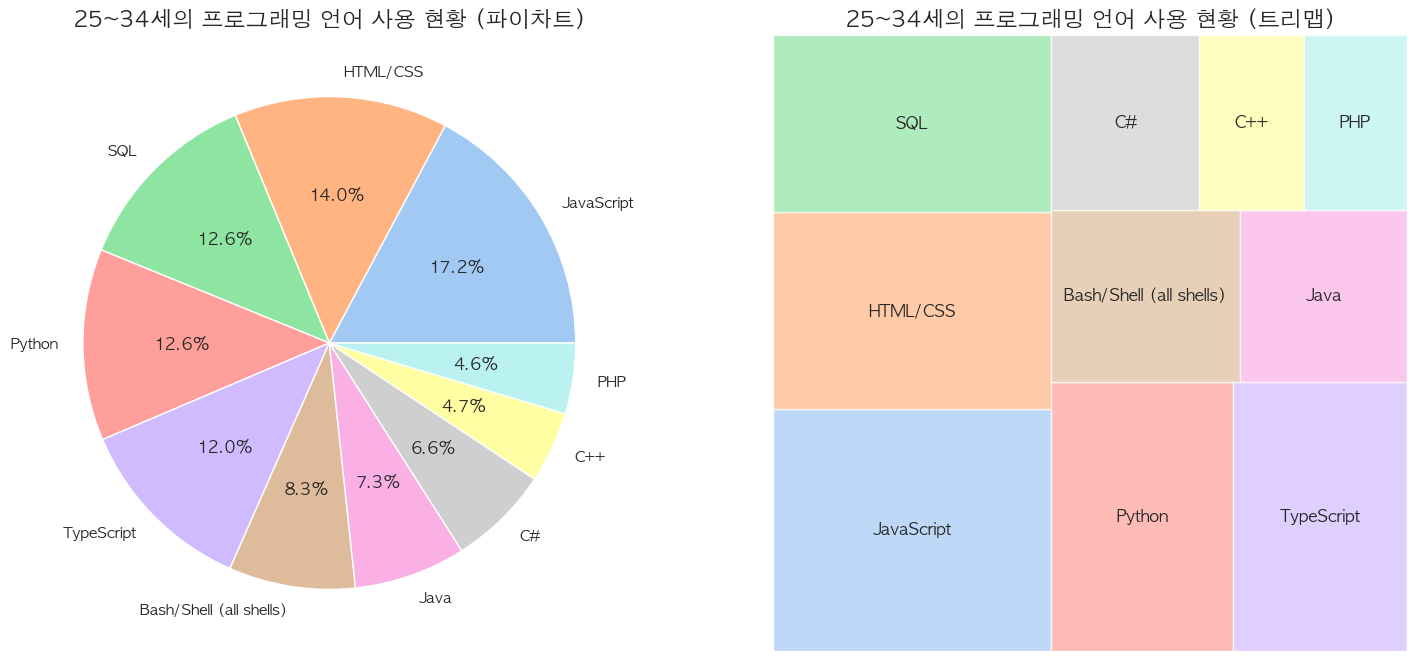

In [790]:
plt.figure(figsize=(18, 8))

# 첫 번째 subplot (원형 파이 차트)
plt.subplot(1, 2, 1)
sns.set_palette("pastel")
plt.pie(x=languages_for_25_34[:10], labels=languages_for_25_34[:10].index, autopct='%1.1f%%')
plt.title('25~34세의 프로그래밍 언어 사용 현황 (파이차트)', fontsize=16)

# 두 번째 subplot (Treemap)
plt.subplot(1, 2, 2)
sns.set_palette("pastel")
squarify.plot(sizes=languages_for_25_34[:10], label=languages_for_25_34[:10].index, color=sns.color_palette("pastel"), alpha=0.7)
plt.title('25~34세의 프로그래밍 언어 사용 현황 (트리맵)', fontsize=16)
plt.axis('off')

plt.show()

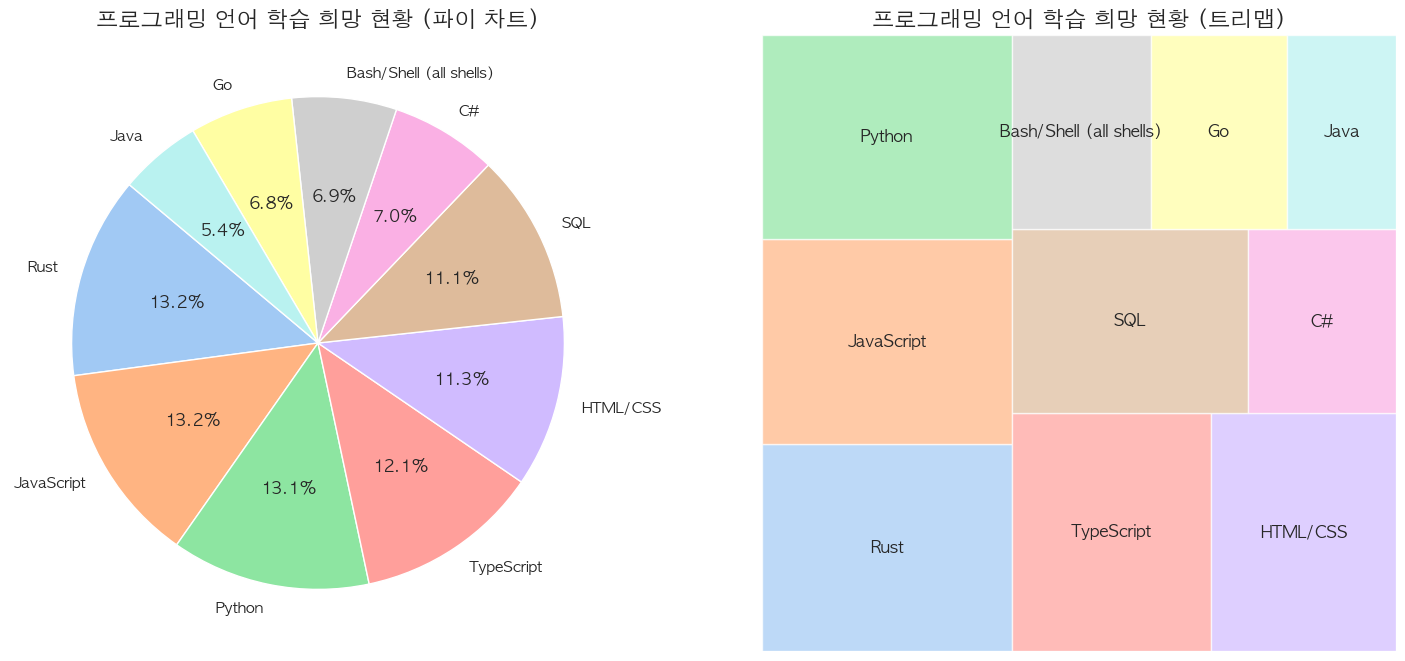

In [791]:
plt.figure(figsize=(18, 8))

# 첫 번째 subplot (원형 파이 차트)
plt.subplot(1, 2, 1)
sns.set_palette("pastel")
plt.pie(x=languages_want[:10], labels=languages_want[:10].index, autopct='%1.1f%%', startangle=140)
plt.title('프로그래밍 언어 학습 희망 현황 (파이 차트)', fontsize=16)

# 두 번째 subplot (Treemap)
plt.subplot(1, 2, 2)
sns.set_palette("pastel")
squarify.plot(sizes=languages_want[:10], label=languages_want[:10].index, color=sns.color_palette("pastel"), alpha=0.7)
plt.title('프로그래밍 언어 학습 희망 현황 (트리맵)', fontsize=16)
plt.axis('off')

plt.show()

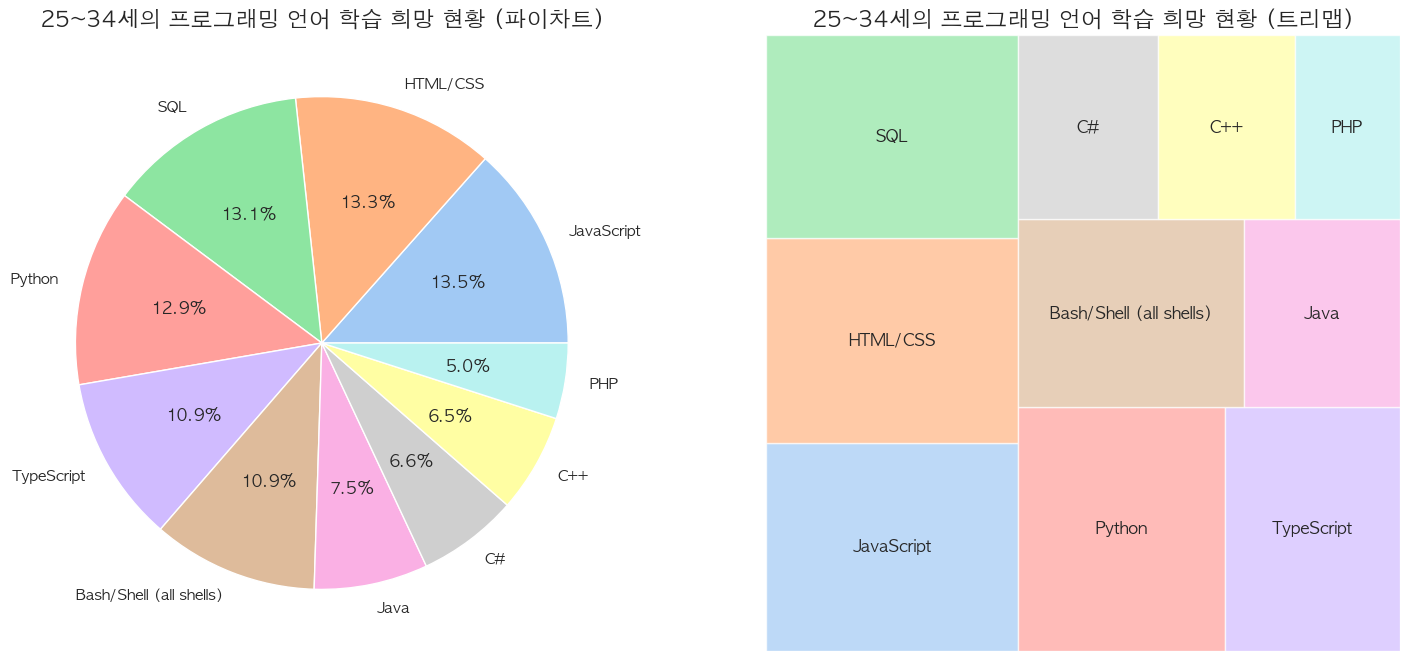

In [792]:
plt.figure(figsize=(18, 8))

# 첫 번째 subplot (원형 파이 차트)
plt.subplot(1, 2, 1)
sns.set_palette("pastel")
plt.pie(x=languages_want_for_25_34[:10], labels=languages_for_25_34[:10].index, autopct='%1.1f%%')
plt.title('25~34세의 프로그래밍 언어 학습 희망 현황 (파이차트)', fontsize=16)

# 두 번째 subplot (Treemap)
plt.subplot(1, 2, 2)
sns.set_palette("pastel")
squarify.plot(sizes=languages_want_for_25_34[:10], label=languages_for_25_34[:10].index, color=sns.color_palette("pastel"), alpha=0.7)
plt.title('25~34세의 프로그래밍 언어 학습 희망 현황 (트리맵)', fontsize=16)
plt.axis('off')

plt.show()

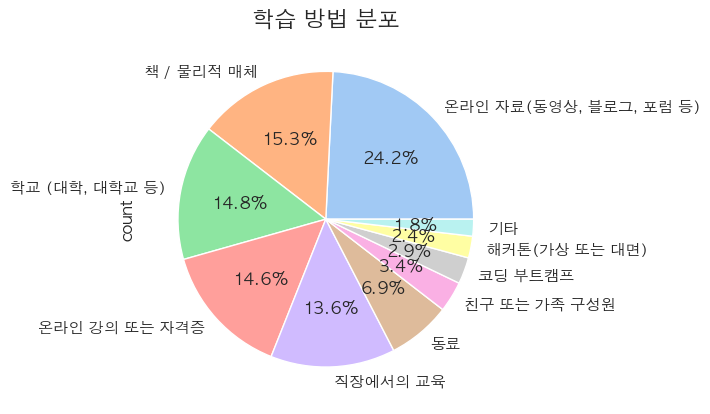

In [793]:
exploded_learnCode.value_counts().plot.pie(autopct='%1.01f%%')
plt.title('학습 방법 분포', fontsize=16)
plt.show()

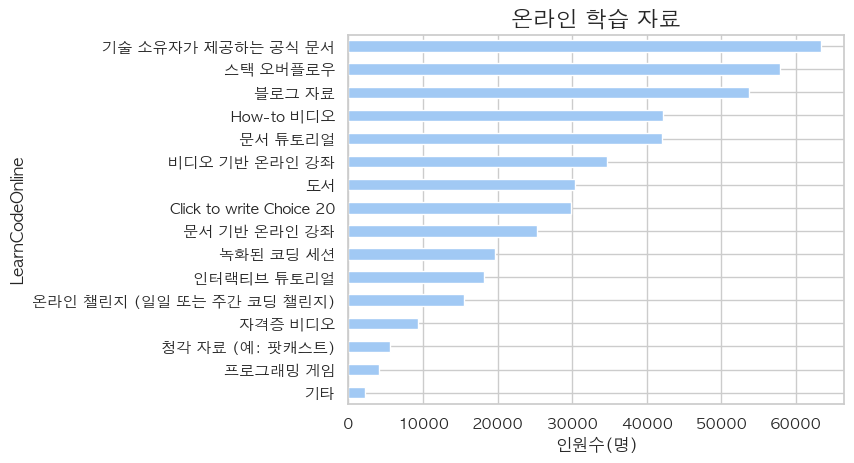

In [794]:
exploded_learnCodeOnline.sort_values(ascending=True).plot.barh()

plt.title('온라인 학습 자료', fontsize=16)
plt.xlabel('인원수(명)')
plt.show()

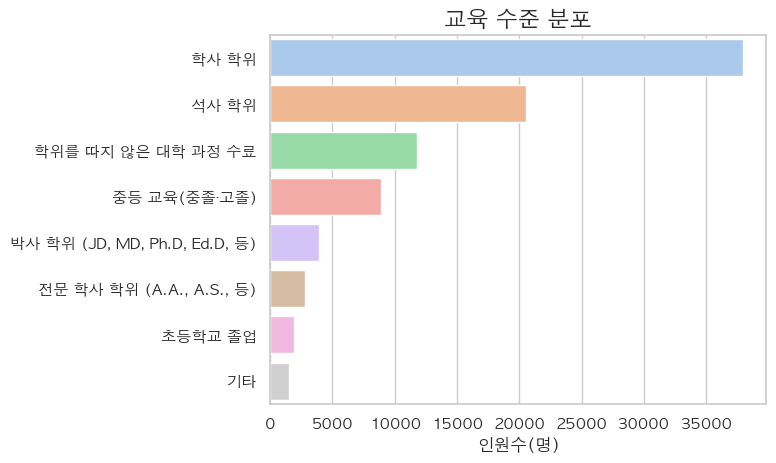

In [795]:
# 교육 수준에 대한 빈도수 계산
ed_level_counts = revised_df['EdLevel'].value_counts()

# 인덱스명을 한글로 변경
ed_level_counts.index = [
    '학사 학위',
    '석사 학위',
    '학위를 따지 않은 대학 과정 수료',
    '중등 교육(중졸·고졸)',
    '박사 학위 (JD, MD, Ph.D, Ed.D, 등)',
    '전문 학사 학위 (A.A., A.S., 등)',
    '초등학교 졸업',
    '기타'
]

sns.barplot(x=ed_level_counts, y=ed_level_counts.index)
plt.xlabel('인원수(명)')
plt.title('교육 수준 분포', fontsize=16)

plt.show()

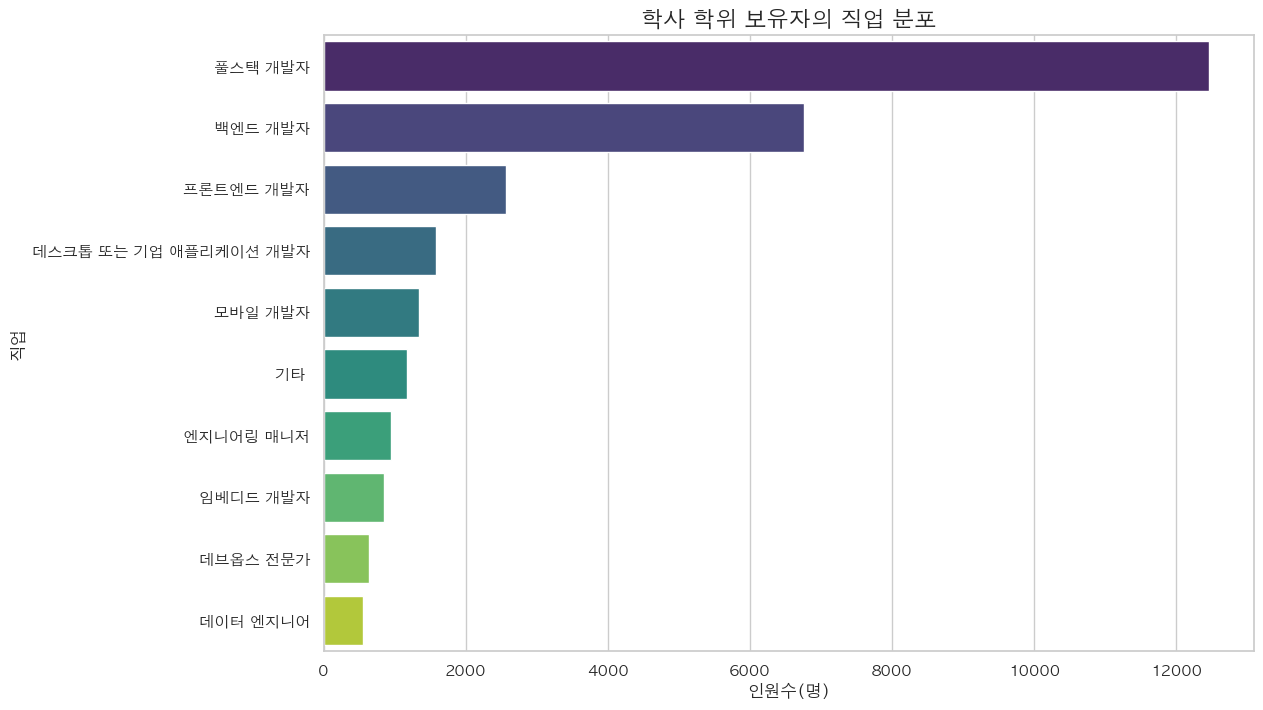

In [796]:
# 학사 학위 보유자의 직업 분포
plt.figure(figsize=(12, 8))

sns.barplot(x=bachelor_job_counts, y=bachelor_job_counts.index, palette='viridis')

plt.title('학사 학위 보유자의 직업 분포', fontsize=16)

plt.xlabel('인원수(명)')
plt.ylabel('직업')

plt.show()

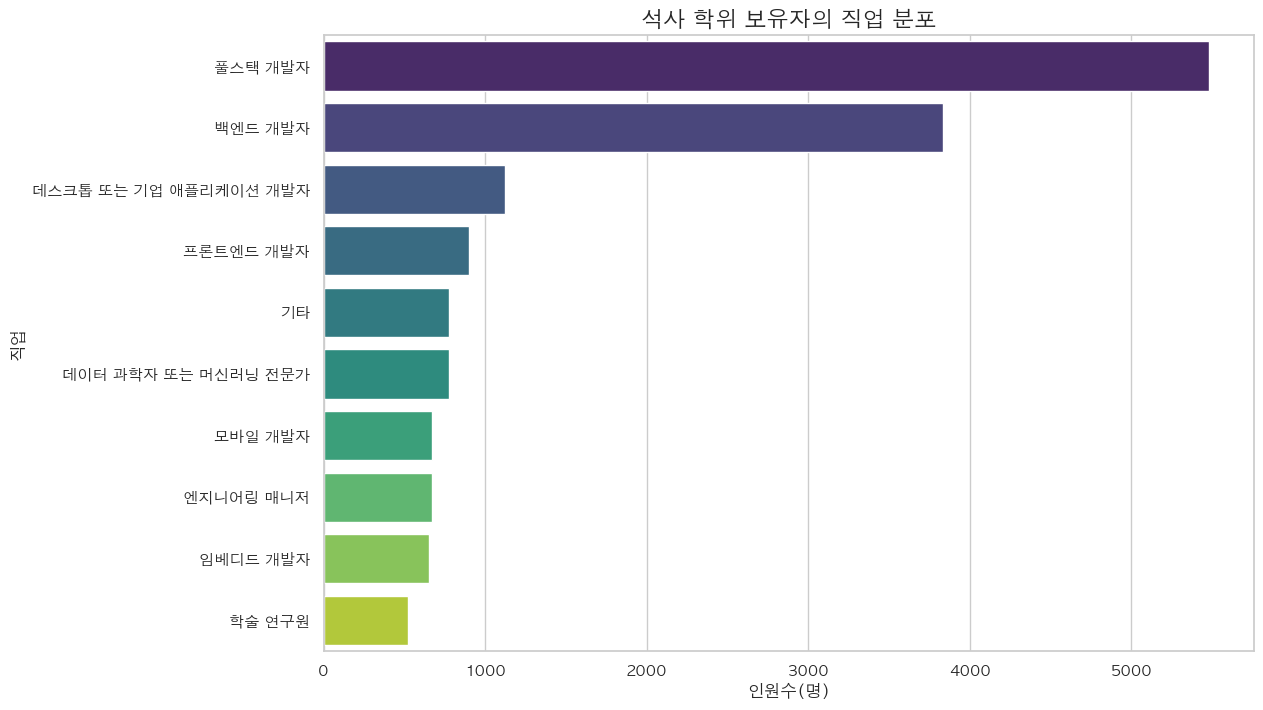

In [797]:
# 석사 학위 보유자의 직업 분포
plt.figure(figsize=(12, 8))

sns.barplot(x=master_job_counts, y=master_job_counts.index, palette='viridis')

plt.title('석사 학위 보유자의 직업 분포', fontsize=16)

plt.xlabel('인원수(명)')
plt.ylabel('직업')

plt.show()

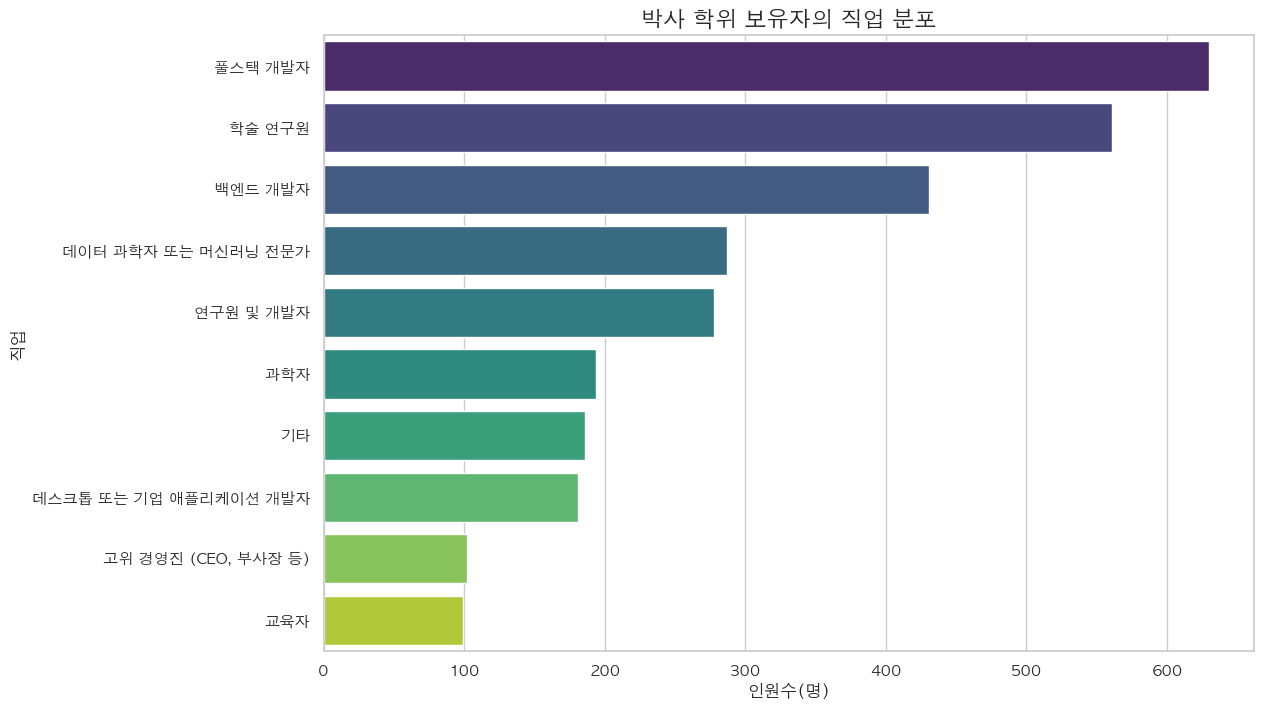

In [798]:
# 박사 학위 보유자의 직업 분포
plt.figure(figsize=(12, 8))

sns.barplot(x=professional_job_counts, y=professional_job_counts.index, palette='viridis')

plt.title('박사 학위 보유자의 직업 분포', fontsize=16)

plt.xlabel('인원수(명)')
plt.ylabel('직업')

plt.show()

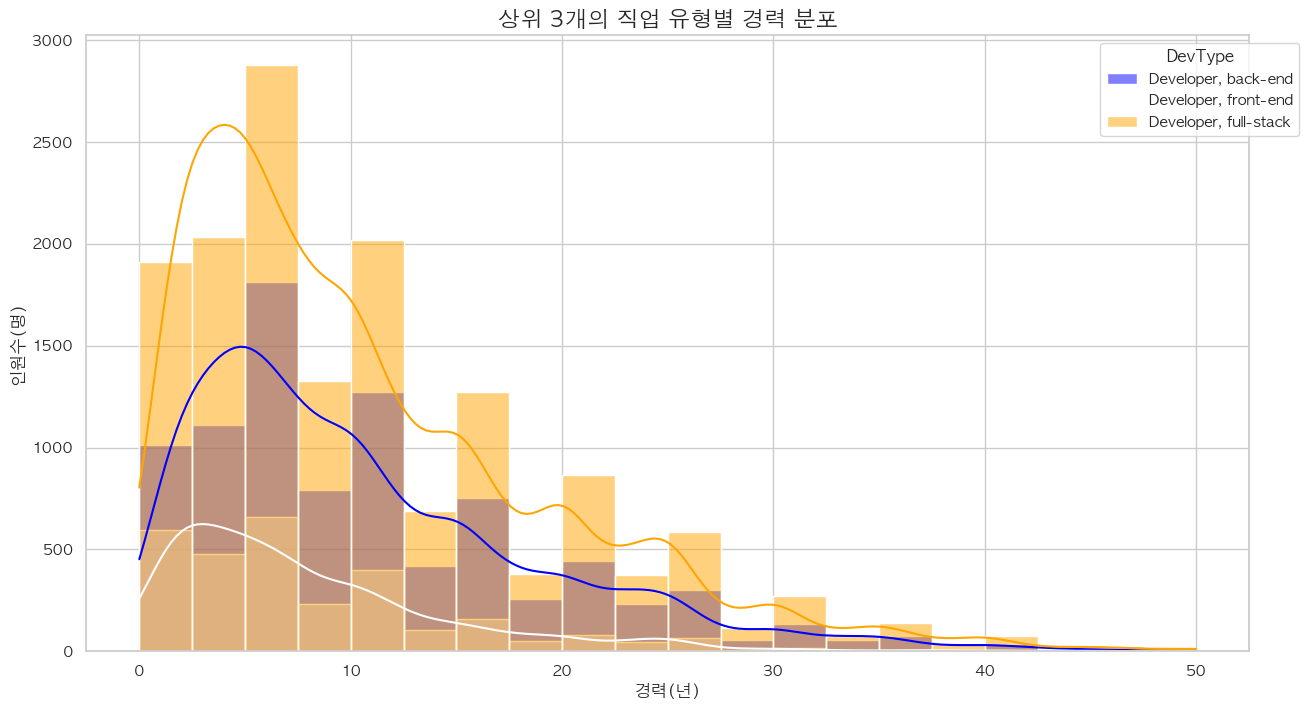

In [799]:
# 상위 3개의 개발 유형을 추출
top_devtypes = revised_df['DevType'].value_counts().head(3).index

# 개발 유형을 기준으로 그룹화 (상위 3개만 선택)
grouped_by_devtype = revised_df[revised_df['DevType'].isin(top_devtypes)].groupby('DevType')

# 색상 리스트 정의
colors = ['blue', 'white', 'orange']

# 각 DevType에 대한 경력 분포 시각화
plt.figure(figsize=(15, 8))
for i, (devtype, data) in enumerate(grouped_by_devtype):
    sns.histplot(data=data, x='WorkExp', label=devtype, kde=True, bins=20, alpha=0.5, color=colors[i])

plt.title('상위 3개의 직업 유형별 경력 분포', fontsize=16)
plt.xlabel('경력(년)')
plt.ylabel('인원수(명)')
plt.legend(title='DevType', bbox_to_anchor=(1.05, 1), loc='upper right')

plt.show()